人工智能211-11521118-孔涵玥

In [51]:
import tensorflow as tf
from keras import layers, models, regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

一、数据集划分————测试集和训练集

In [12]:
import random
# 统计列表list中每个标签总数
def type_count(data):
    # 类别1————0、1、2、3
    count1 = 0
    count1 += sum(row.count(0) for row in data) + sum(row.count(1) for row in data)
    count1 += sum(row.count(2) for row in data) + sum(row.count(3) for row in data)
    # 类别2————4、5、6
    count2 = 0
    count2 += sum(row.count(4) for row in data) + sum(row.count(5) for row in data)
    count2 += sum(row.count(6) for row in data)
    # 类别3————7、8、9
    count3 = 0
    count3 += sum(row.count(7) for row in data) + sum(row.count(8) for row in data)
    count3 += sum(row.count(9) for row in data)

    return count1, count2, count3

# 初始数据
def all_dataset_input():
    print("---------------------------数据处理部分---------------------------")
    # 加载并读取数据集 + 统计每个标签总数 + 随机打乱 + 统计每个标签总数

    # 加载并读取数据集
    all_data_2020 = []
    with open('数据集/小麦赤霉病数据集_2020/2020(1243 labels).txt', 'r') as file:
        next(file)  # 跳过第一行
        for line_number, line in enumerate(file):
            if line_number < sum(1 for _ in
                                 open(
                                     '数据集/小麦赤霉病数据集_2020/2020(1243 labels).txt')) - 1:  # Check if it's not the last
                data = line.strip().split(';')
                all_data_2020.append(("数据集/小麦赤霉病数据集_2020/2020(1243 images)/" + data[0], int(data[1])))
    print("2020年样本总数：" + str(len(all_data_2020)))

    all_data_2021 = []
    with open('数据集/小麦赤霉病数据集_2021/2021(352 labels).txt', 'r') as file:
        next(file)  # 跳过第一行
        for line_number, line in enumerate(file):
            if line_number < sum(1 for _ in
                                 open(
                                     '数据集/小麦赤霉病数据集_2021/2021(352 labels).txt')) - 1:  # Check if it's not the last line
                data = line.strip().split(';')
                all_data_2021.append(("数据集/小麦赤霉病数据集_2021/2021(352 images)/" + data[0], int(data[1])))
    print("2021年样本总数：" + str(len(all_data_2021)))

    all_data_2022 = []
    with open('数据集/小麦赤霉病数据集_2022/2022(512 labels).txt', 'r') as file:
        next(file)  # 跳过第一行
        for line_number, line in enumerate(file):
            if line_number < sum(1 for _ in
                                 open(
                                     '数据集/小麦赤霉病数据集_2022/2022(512 labels).txt')) - 1:  # Check if it's not the last line
                data = line.strip().split(';')
                all_data_2022.append(("数据集/小麦赤霉病数据集_2022/2022(512 images)/" + data[0], int(data[1])))
    print("2022年样本总数：" + str(len(all_data_2022)), end='\n\n')

    # 统计每个标签总数
    # 2020年的计数
    count1_20, count2_20, count3_20 = type_count(all_data_2020)
    # 2021年的计数
    count1_21, count2_21, count3_21 = type_count(all_data_2021)
    # 2022年的计数
    count1_22, count2_22, count3_22 = type_count(all_data_2022)
    count1 = count1_20 + count1_21 + count1_22
    count2 = count2_20 + count2_21 + count2_22
    count3 = count3_20 + count3_21 + count3_22
    print("分类前样本中 一类标签数量：" + str(count1) + '\n分类前样本中 二类标签数量：' + str(
        count2) + '\n分类前样本中 三类标签数量：' + str(count3), end='\n\n')

    # 随机打乱
    # 拼接三个按年份划分的数据集
    all_data = all_data_2020 + all_data_2021 + all_data_2022
    # 使用random模块的shuffle函数对数据集进行随机打乱
    random.shuffle(all_data)
    # 计算划分的索引————8：2的比例
    split_index = int(0.8 * len(all_data))
    # 划分为训练集和测试集
    training_set = all_data[:split_index]
    testing_set = all_data[split_index:]
    print("训练集数量：" + str(len(training_set)) + '\n测试集数量：' + str(len(testing_set)), end='\n\n')

    # 训练集中
    count1, count2, count3 = type_count(training_set)
    print("训练集中 一类标签数量：" + str(count1) + '\n训练集中 二类标签数量：' + str(
        count2) + '\n训练集中 三类标签数量：' + str(count3))

    # 测试集中
    count1, count2, count3 = type_count(testing_set)
    print("测试集中 一类标签数量：" + str(count1) + '\n测试集中 二类标签数量：' + str(
        count2) + '\n测试集中 三类标签数量：' + str(count3), end='\n\n')

    # 十分类标签改为三分类标签
    for index, (i, j) in enumerate(training_set):
        if 0 <= j <= 3:
            training_set[index] = (i, 1)  # 修改标签为1
        elif 4 <= j <= 6:
            training_set[index] = (i, 2)  # 修改标签为2
        elif 7 <= j <= 9:
            training_set[index] = (i, 3)  # 修改标签为3

    # 十分类标签改为三分类标签
    for index, (i, j) in enumerate(testing_set):
        if 0 <= j <= 3:
            testing_set[index] = (i, 1)  # 修改标签为1
        elif 4 <= j <= 6:
            testing_set[index] = (i, 2)  # 修改标签为2
        elif 7 <= j <= 9:
            testing_set[index] = (i, 3)  # 修改标签为3

    return training_set, testing_set

In [13]:
pre_train_set, pre_test_set = all_dataset_input()

---------------------------数据处理部分---------------------------
2020年样本总数：1243
2021年样本总数：352
2022年样本总数：512

分类前样本中 一类标签数量：502
分类前样本中 二类标签数量：1051
分类前样本中 三类标签数量：554

训练集数量：1685
测试集数量：422

训练集中 一类标签数量：410
训练集中 二类标签数量：839
训练集中 三类标签数量：436
测试集中 一类标签数量：92
测试集中 二类标签数量：212
测试集中 三类标签数量：118



二、数据读入 + 预处理 + 数据增强

In [14]:
# 从路径中读取图片
def read_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)  # 解码彩图

    if image.shape[0] < image.shape[1]:
        new_height = 256
        new_width = tf.cast(256 * (image.shape[1] / image.shape[0]), tf.int32)
    else:
        new_width = 256
        new_height = tf.cast(256 * (image.shape[0] / image.shape[1]), tf.int32)
    resized_image = tf.image.resize(image, [new_height, new_width])

    # 计算裁剪后的左上角位置
    start_x = max((resized_image.shape[0] - 224) // 2, 0)
    start_y = max((resized_image.shape[1] - 224) // 2, 0)
    # 裁剪图像
    cropped_image = resized_image[start_x:start_x + 224, start_y:start_y + 224, :]
    return cropped_image

# 输入数据预处理
def get_batch_input(pre_training_set, pre_testing_set):
    trained_data = []
    trained_label = []
    tested_data = []
    tested_label = []

    for i, j in pre_training_set:
        img = read_image(i)
        if img.shape[0] != 224 or img.shape[1] != 224:
            print(i + "处理出现问题，放弃本图像")
        else:
            trained_data.append(img)
            trained_label.append(j - 1)

    for i, j in pre_testing_set:
        img = read_image(i)
        if img.shape[0] != 224 or img.shape[1] != 224:
            print(i + "处理出现问题，放弃本图像")
        else:
            tested_data.append(img)
            tested_label.append(j - 1)

    print("\n\n---------------------------模型构建部分---------------------------\n")
    return trained_data, trained_label, tested_data, tested_label

In [15]:
train_data, train_label, test_data, test_label = get_batch_input(pre_train_set, pre_test_set)
del pre_train_set
del pre_test_set
train_data_tensor = tf.stack(train_data)
del train_data
train_label_tensor = tf.stack(train_label)
del train_label
test_data_tensor = tf.stack(test_data)
del test_data
test_label_tensor = tf.stack(test_label)
del test_label

 # 对训练数据进行增强
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_data_tensor) 



---------------------------模型构建部分---------------------------



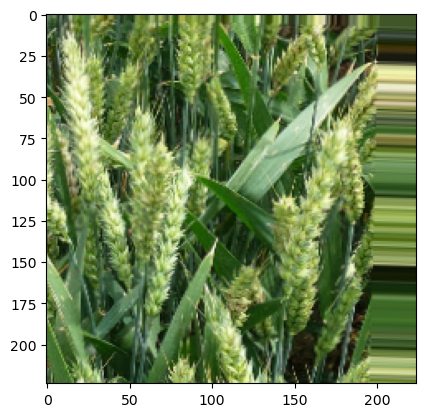

In [127]:

# 生成增强后的图像
augmented_data_generator = datagen.flow(train_data_tensor, batch_size=1)

# 打印一张增强后的图像
augmented_image = augmented_data_generator.next()[0].astype('int')  # 获取增强后的图像
plt.imshow(augmented_image)
plt.show()

数据增强——随机旋转展示

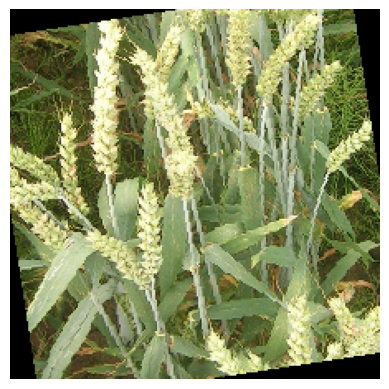

In [7]:
import numpy as np
from PIL import Image


img = read_image(r"数据集\小麦赤霉病数据集_2021\2021(352 images)\1019_2.JPG")
img = np.array(img, dtype=np.uint8)  # 将数组类型转换为uint8
img = Image.fromarray(img)  # 使用Image.fromarray创建图像对象

# 随机旋转图像
rotated_image = img.rotate(random.uniform(-20, 20))

# 打印旋转后的图像
plt.imshow(rotated_image)
plt.axis('off')
plt.show()


数据增强——随机偏移（水平）展示

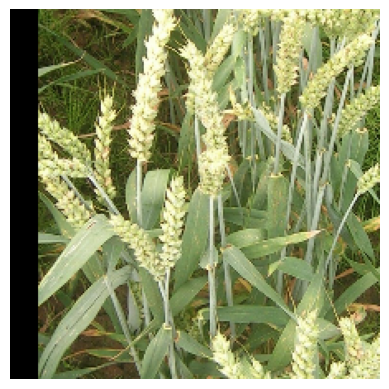

In [123]:
import numpy as np
from PIL import Image

img = read_image(r"数据集\小麦赤霉病数据集_2021\2021(352 images)\1019_2.JPG")
img = np.array(img, dtype=np.uint8)  # 将数组类型转换为uint8
img = Image.fromarray(img)  # 使用Image.fromarray创建图像对象

# 水平偏移
offset_range = int(img.width * 0.2)
offset = np.random.randint(-offset_range, offset_range + 1)
offset_img = img.transform(img.size, Image.AFFINE, (1, 0, offset, 0, 1, 0))

plt.imshow(offset_img)
plt.axis('off')
plt.show()

数据增强——随机偏移（竖直）展示

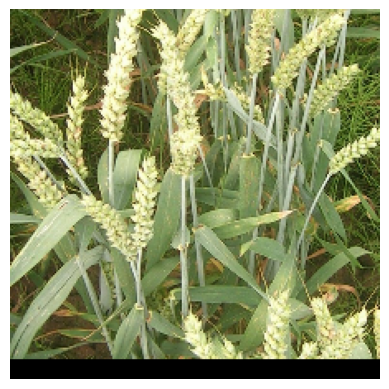

In [124]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = read_image(r"数据集\小麦赤霉病数据集_2021\2021(352 images)\1019_2.JPG")
img = np.array(img, dtype=np.uint8)  # 将数组类型转换为uint8
img = Image.fromarray(img)  # 使用Image.fromarray创建图像对象

# 竖直偏移
offset_range = int(img.height * 0.2)
offset = np.random.randint(-offset_range, offset_range + 1)
offset_img = img.transform(img.size, Image.AFFINE, (1, 0, 0, 0, 1, offset))

plt.imshow(offset_img)
plt.axis('off')
plt.show()

数据增强——水平翻转展示

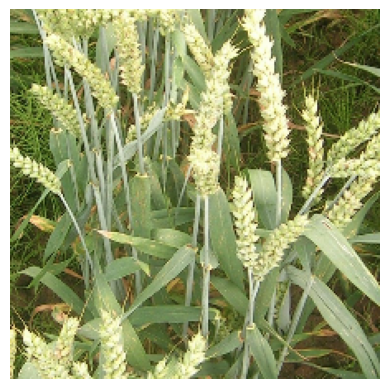

In [125]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = read_image(r"数据集\小麦赤霉病数据集_2021\2021(352 images)\1019_2.JPG")
img = np.array(img, dtype=np.uint8)  # 将数组类型转换为uint8
img = Image.fromarray(img)  # 使用Image.fromarray创建图像对象
# 水平翻转
flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)

plt.imshow(flipped_img)
plt.axis('off')
plt.show()

三、构建卷积神经网络模型

定义：precision, recall, f1_score的计算方式

In [16]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    return K.mean(precision)

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (possible_positives + K.epsilon())
    return  K.mean(recall)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

模型A（7*7，10层）

In [147]:
def model_A():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为7×7)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (7, 7), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)  # 设置学习率为0.0005
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    #               metrics=['accuracy', precision, recall, f1_score])
    model.summary()  # 打印模型结构参数
    return model

模型B（7*7，15层）

In [148]:
def model_B():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(224, 224, 3), strides=2))  # 卷积层(卷积核为7×7)
    model.add(layers.Conv2D(32, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())  # 添加批标准化层
    model.add(layers.Conv2D(128, (7, 7), activation='relu', strides=2))
    model.add(layers.Conv2D(128, (7, 7), activation='relu', strides=2))
    model.add(layers.BatchNormalization())  # 添加批标准化层
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dropout(0.25))  # 25%的神经元被置为零
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    #               metrics=['accuracy', precision, recall, f1_score])
    model.summary()  # 打印模型结构参数
    return model

模型C（7*7，20层）

In [149]:
def model_C():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(224, 224, 3), strides=2))  # 卷积层(卷积核为7×7)
    model.add(layers.Conv2D(32, (7, 7), activation='relu'))
    model.add(layers.Conv2D(32, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  # 25%的神经元被置为零
    model.add(layers.BatchNormalization())  # 添加批标准化层
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())  # 添加批标准化层
    model.add(layers.Conv2D(128, (7, 7), activation='relu'))
    model.add(layers.Conv2D(128, (7, 7), activation='relu'))
    model.add(layers.BatchNormalization())  # 添加批标准化层
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dropout(0.25))  # 25%的神经元被置为零
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    # opt = tf.keras.optimizers.Adam(learning_rate=0.005)  # 设置学习率
    # model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', precision, recall, f1_score])
    model.summary()  # 打印模型结构参数
    return model

模型D（5*5，10层）

In [93]:
def model_D():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为5×5)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (5, 5), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)  # 设置学习率为0.0005
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    #               metrics=['accuracy', precision, recall, f1_score])
    model.summary()  # 打印模型结构参数
    return model

模型E（3*3，10层）

In [40]:
def model_E():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0008)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    #               metrics=['accuracy', precision, recall, f1_score])
    model.summary()  # 打印模型结构参数
    return model

模型F（3*3，10层）+ ReLU

In [135]:
def model_F():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation='relu'))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation='relu')) 
    model.add(layers.Conv2D(16, (1, 1), activation='relu'))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0007)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型F（3*3，10层）+ Sigmoid

In [132]:
def model_F_Sigmoid():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='sigmoid', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation='sigmoid'))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation='sigmoid')) 
    model.add(layers.Conv2D(16, (1, 1), activation='sigmoid'))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='sigmoid'))  # 全连接层
    model.add(layers.Dense(64, activation='sigmoid'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0007)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型F（3*3，10层）+ Tanh

In [133]:
def model_F_Tanh():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='tanh', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation='tanh'))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation='tanh')) 
    model.add(layers.Conv2D(16, (1, 1), activation='tanh'))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='tanh'))  # 全连接层
    model.add(layers.Dense(64, activation='tanh'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0007)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型F（3*3，10层）+ LeakyReLU

In [134]:
def model_F_LeakyReLU():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=tf.nn.leaky_relu, input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation=tf.nn.leaky_relu))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation=tf.nn.leaky_relu)) 
    model.add(layers.Conv2D(16, (1, 1), activation=tf.nn.leaky_relu))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation=tf.nn.leaky_relu))  # 全连接层
    model.add(layers.Dense(64, activation=tf.nn.leaky_relu))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0006)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型G1（3*3，10层）——在F的基础上添加Dropout层(Dropout rate=0.3)

In [127]:
def model_G1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation='relu'))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation='relu')) 
    model.add(layers.Conv2D(16, (1, 1), activation='relu'))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dropout(0.3))  # 添加Dropout层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))  # 添加Dropout层
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型G2（3*3，10层）——在F的基础上添加Dropout层(Dropout rate=0.5)

In [128]:
def model_G2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation='relu'))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation='relu')) 
    model.add(layers.Conv2D(16, (1, 1), activation='relu'))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dropout(0.5))  # 添加Dropout层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))  # 添加Dropout层
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型G3（3*3，10层）——在F的基础上添加Dropout层(Dropout rate=0.7)

In [129]:
def model_G3():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=3))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(64, (1, 1), activation='relu'))  # 1x1卷积层
    model.add(layers.Conv2D(32, (1, 1), activation='relu')) 
    model.add(layers.Conv2D(16, (1, 1), activation='relu'))  
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dropout(0.7))  # 添加Dropout层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.7))  # 添加Dropout层
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.0007)  # 设置学习率
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model

模型 VGG

In [37]:
def simple_vgg_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))  # 卷积层(卷积核为3×3)
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 池化层(采用最大池化，核大小为2×2)
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Flatten())  # 展平层 降维
    model.add(layers.Dense(128, activation='relu'))  # 全连接层
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 输出层(3种类）

    # 设置优化器与损失函数
    opt = tf.keras.optimizers.Adam(learning_rate=0.00005)  # 设置学习率为0.0003
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])

    model.summary()  # 打印模型结构参数
    return model



模型 ResNet

In [23]:
import tensorflow as tf
from keras import layers, models

def simple_resnet_model():
    input_layer = layers.Input(shape=(224, 224, 3))
    x = layers.Conv2D(64, (7, 7), activation='relu', strides=3, padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = resnet_block(x, filters=[64, 64, 256], stage=1, block='a')
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(3, activation='softmax')(x)
    model = models.Model(inputs=input_layer, outputs=x)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', precision, recall, f1_score])
    model.summary()

    return model

def resnet_block(input_tensor, filters, stage, block, strides=(1, 1)):
    f1, f2, f3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(f1, (1, 1), strides=strides, name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(f2, (3, 3), padding='same', name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(f3, (1, 1), name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2c')(x)

    shortcut = input_tensor
    if strides != (1, 1) or input_tensor.shape[-1] != f3:
        shortcut = layers.Conv2D(f3, (1, 1), strides=strides, name=conv_name_base + '1')(input_tensor)
        shortcut = layers.BatchNormalization(name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


四、模型训练

创建回调函数来保存拟合最好的模型

In [11]:
print("\n---------------------------模型训练部分---------------------------\n")
checkpoint_A = ModelCheckpoint(
    "best_model_A.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1)

checkpoint_B = ModelCheckpoint(
    "best_model_B.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1)

checkpoint_C = ModelCheckpoint(
    "best_model_C.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1)


---------------------------模型训练部分---------------------------



模型 ResNet

In [24]:
modelres = simple_resnet_model()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 75, 75, 64)   9472        ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 37, 37, 64)  0           ['conv2d_3[0][0]']               
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 37, 37, 64)   4160        ['max_pooling2d_3[0][0]']  

In [25]:
historyres = modelres.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelres.save("trained_model_res.h5")

Epoch 1/15
27/27 [==============================] - 18s 610ms/step - loss: 0.9450 - accuracy: 0.5507 - precision: 6666667.5000 - recall: 0.3557 - f1_score: 0.6482 - val_loss: 8.8592 - val_accuracy: 0.2796 - val_precision: 0.2618 - val_recall: 0.3333 - val_f1_score: 0.2931
Epoch 2/15
27/27 [==============================] - 16s 604ms/step - loss: 0.8859 - accuracy: 0.5703 - precision: 2222223.5000 - recall: 0.3674 - f1_score: 0.6153 - val_loss: 1.0589 - val_accuracy: 0.4479 - val_precision: 1.1869 - val_recall: 0.3535 - val_f1_score: 0.5442
Epoch 3/15
27/27 [==============================] - 17s 611ms/step - loss: 0.8579 - accuracy: 0.6030 - precision: 123458.0391 - recall: 0.3709 - f1_score: 0.5709 - val_loss: 1.2221 - val_accuracy: 0.3791 - val_precision: 1.2620 - val_recall: 0.3726 - val_f1_score: 0.5742
Epoch 4/15
27/27 [==============================] - 16s 601ms/step - loss: 0.8397 - accuracy: 0.6012 - precision: 1358025.5000 - recall: 0.3687 - f1_score: 0.5774 - val_loss: 1.6814 

模型 VGG

In [38]:
modelvgg = simple_vgg_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 28, 28, 128)     

In [39]:
historyvgg =modelvgg.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelvgg.save("trained_model_vgg.h5")

Epoch 1/15
27/27 [==============================] - 43s 2s/step - loss: 23.2485 - accuracy: 0.3858 - precision: 0.4795 - recall: 0.3420 - f1_score: 0.3718 - val_loss: 2.3000 - val_accuracy: 0.3673 - val_precision: 0.9107 - val_recall: 0.3568 - val_f1_score: 0.5118
Epoch 2/15
27/27 [==============================] - 43s 2s/step - loss: 2.8910 - accuracy: 0.4350 - precision: 246914.2969 - recall: 0.3535 - f1_score: 0.4791 - val_loss: 1.6894 - val_accuracy: 0.4739 - val_precision: 0.9478 - val_recall: 0.3654 - val_f1_score: 0.5264
Epoch 3/15
27/27 [==============================] - 43s 2s/step - loss: 1.4978 - accuracy: 0.5181 - precision: 370371.2812 - recall: 0.3623 - f1_score: 0.5276 - val_loss: 1.9440 - val_accuracy: 0.4858 - val_precision: 952382.1250 - val_recall: 0.3611 - val_f1_score: 0.5772
Epoch 4/15
27/27 [==============================] - 42s 2s/step - loss: 1.1095 - accuracy: 0.5893 - precision: 493828.0625 - recall: 0.3631 - f1_score: 0.5338 - val_loss: 1.5822 - val_accuracy

模型A

In [150]:
modelA = model_A()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 73, 73, 32)        4736      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 30, 64)        100416    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 5, 5, 128)         401536    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2, 128)       

In [151]:
historyA = modelA.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    # callbacks=[checkpoint_A],
    shuffle=True)
modelA.save("trained_model_A.h5")

Epoch 1/15


27/27 [==============================] - 10s 286ms/step - loss: 5.5191 - accuracy: 0.3816 - precision: 123457.5625 - recall: 0.3590 - f1_score: 0.4650 - val_loss: 1.1626 - val_accuracy: 0.4668 - val_precision: 4761906.0000 - val_recall: 0.3481 - val_f1_score: 0.6503
Epoch 2/15
27/27 [==============================] - 7s 243ms/step - loss: 1.0728 - accuracy: 0.4861 - precision: 1728396.7500 - recall: 0.3558 - f1_score: 0.6093 - val_loss: 1.0635 - val_accuracy: 0.4976 - val_precision: 2857143.7500 - val_recall: 0.3656 - val_f1_score: 0.6402
Epoch 3/15
27/27 [==============================] - 6s 240ms/step - loss: 0.9719 - accuracy: 0.5377 - precision: 987656.1250 - recall: 0.3552 - f1_score: 0.5757 - val_loss: 1.0091 - val_accuracy: 0.5071 - val_precision: 2.5786 - val_recall: 0.3614 - val_f1_score: 0.6194
Epoch 4/15
27/27 [==============================] - 7s 268ms/step - loss: 0.8997 - accuracy: 0.5911 - precision: 3086420.5000 - recall: 0.3654 - f1_score: 0.5976 - val_loss: 0.9851 - v

模型B

In [154]:
modelB = model_B()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 109, 109, 32)      4736      
                                                                 
 conv2d_52 (Conv2D)          (None, 103, 103, 32)      50208     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 51, 51, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 45, 45, 64)        100416    
                                                                 
 conv2d_54 (Conv2D)          (None, 39, 39, 64)        200768    
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 19, 19, 64)       0         
 g2D)                                                

In [155]:
historyB = modelB.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=16,
    validation_data=(test_data_tensor, test_label_tensor),
    # callbacks=[checkpoint_B],
    shuffle=True)
modelB.save("trained_model_B.h5")

Epoch 1/15
106/106 [==============================] - 106s 982ms/step - loss: 1.5657 - accuracy: 0.4902 - precision: 6477986.0000 - recall: 0.3481 - f1_score: 0.6545 - val_loss: 1.1699 - val_accuracy: 0.4858 - val_precision: 20123458.0000 - val_recall: 0.2497 - val_f1_score: 0.4986
Epoch 2/15
106/106 [==============================] - 83s 778ms/step - loss: 1.0508 - accuracy: 0.5264 - precision: 6761007.0000 - recall: 0.3373 - f1_score: 0.6344 - val_loss: 1.1567 - val_accuracy: 0.5142 - val_precision: 12962961.0000 - val_recall: 0.4406 - val_f1_score: 0.8678
Epoch 3/15
106/106 [==============================] - 86s 812ms/step - loss: 0.9793 - accuracy: 0.5632 - precision: 4716980.5000 - recall: 0.3514 - f1_score: 0.6469 - val_loss: 9.6158 - val_accuracy: 0.2512 - val_precision: 0.2543 - val_recall: 0.3313 - val_f1_score: 0.2870
Epoch 4/15
106/106 [==============================] - 128s 1s/step - loss: 0.9760 - accuracy: 0.5448 - precision: 5503145.5000 - recall: 0.3594 - f1_score: 0.66

模型C

In [158]:
modelC = model_C()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 109, 109, 32)      4736      
                                                                 
 conv2d_66 (Conv2D)          (None, 103, 103, 32)      50208     
                                                                 
 conv2d_67 (Conv2D)          (None, 97, 97, 32)        50208     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                     

In [159]:
historyC = modelC.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=16,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelC.save("trained_model_C.h5")

Epoch 1/15
106/106 [==============================] - 191s 2s/step - loss: 2.1535 - accuracy: 0.4445 - precision: 9245283.0000 - recall: 0.3461 - f1_score: 0.6728 - val_loss: 1.9851 - val_accuracy: 0.2725 - val_precision: 18641976.0000 - val_recall: 0.2183 - val_f1_score: 0.4357
Epoch 2/15
106/106 [==============================] - 137s 1s/step - loss: 1.7088 - accuracy: 0.4979 - precision: 7767298.0000 - recall: 0.3447 - f1_score: 0.6657 - val_loss: 1.9206 - val_accuracy: 0.2962 - val_precision: 6543210.0000 - val_recall: 0.4170 - val_f1_score: 0.7351
Epoch 3/15
106/106 [==============================] - 138s 1s/step - loss: 1.4481 - accuracy: 0.5092 - precision: 6666666.5000 - recall: 0.3305 - f1_score: 0.6278 - val_loss: 1.5069 - val_accuracy: 0.3223 - val_precision: 7160495.0000 - val_recall: 0.3596 - val_f1_score: 0.6582
Epoch 4/15
106/106 [==============================] - 187s 2s/step - loss: 1.2731 - accuracy: 0.5318 - precision: 4245283.5000 - recall: 0.3684 - f1_score: 0.6654

模型D

In [99]:
modelD = model_D()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 74, 74, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 33, 33, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 128)         204928    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 128)       

In [100]:
historyD = modelD.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelD.save("trained_model_D.h5")

Epoch 1/15
27/27 [==============================] - 7s 192ms/step - loss: 6.9240 - accuracy: 0.3864 - precision: 987655.2500 - recall: 0.3487 - f1_score: 0.4834 - val_loss: 1.1626 - val_accuracy: 0.5142 - val_precision: 8571430.0000 - val_recall: 0.3477 - val_f1_score: 0.6557
Epoch 2/15
27/27 [==============================] - 5s 172ms/step - loss: 1.0613 - accuracy: 0.4742 - precision: 4197532.5000 - recall: 0.3611 - f1_score: 0.6379 - val_loss: 1.0132 - val_accuracy: 0.4787 - val_precision: 1.7875 - val_recall: 0.3123 - val_f1_score: 0.5287
Epoch 3/15
27/27 [==============================] - 5s 172ms/step - loss: 0.9569 - accuracy: 0.5591 - precision: 370371.8438 - recall: 0.3656 - f1_score: 0.5941 - val_loss: 1.0265 - val_accuracy: 0.4929 - val_precision: 952382.0000 - val_recall: 0.3205 - val_f1_score: 0.5389
Epoch 4/15
27/27 [==============================] - 5s 170ms/step - loss: 0.9538 - accuracy: 0.5335 - precision: 8395063.0000 - recall: 0.3636 - f1_score: 0.6418 - val_loss: 0

模型E

In [41]:
modelE = model_E()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 128)       

In [42]:
historyE = modelE.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelE.save("trained_model_E.h5")

Epoch 1/15


27/27 [==============================] - 5s 135ms/step - loss: 5.1699 - accuracy: 0.3893 - precision: 493828.0312 - recall: 0.3592 - f1_score: 0.5108 - val_loss: 1.1726 - val_accuracy: 0.4289 - val_precision: 7619048.0000 - val_recall: 0.3706 - val_f1_score: 0.7412
Epoch 2/15
27/27 [==============================] - 3s 109ms/step - loss: 1.0433 - accuracy: 0.4884 - precision: 6049383.0000 - recall: 0.3516 - f1_score: 0.6385 - val_loss: 0.9800 - val_accuracy: 0.5308 - val_precision: 3809524.7500 - val_recall: 0.3484 - val_f1_score: 0.6313
Epoch 3/15
27/27 [==============================] - 3s 105ms/step - loss: 0.9778 - accuracy: 0.5205 - precision: 5432100.0000 - recall: 0.3670 - f1_score: 0.6545 - val_loss: 0.9664 - val_accuracy: 0.5166 - val_precision: 7142859.5000 - val_recall: 0.3638 - val_f1_score: 0.6589
Epoch 4/15
27/27 [==============================] - 3s 111ms/step - loss: 0.9232 - accuracy: 0.5549 - precision: 2469136.7500 - recall: 0.3631 - f1_score: 0.6068 - val_loss: 0.93

In [32]:
# 无数据增强时的模型E
modelE1 = model_E()
historyE1 = modelE.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelE.save("trained_model_E1.h5")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)       

模型F + ReLU

In [136]:
modelF = model_F()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 128)       

In [137]:
historyF = modelF.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelF.save("trained_model_F.h5")

Epoch 1/15
27/27 [==============================] - 7s 157ms/step - loss: 1.4827 - accuracy: 0.4226 - precision: 12222223.0000 - recall: 0.3438 - f1_score: 0.6436 - val_loss: 1.0612 - val_accuracy: 0.4384 - val_precision: 29047626.0000 - val_recall: 0.2813 - val_f1_score: 0.5590
Epoch 2/15
27/27 [==============================] - 4s 130ms/step - loss: 1.0554 - accuracy: 0.4718 - precision: 30617288.0000 - recall: 0.3370 - f1_score: 0.6699 - val_loss: 0.9776 - val_accuracy: 0.5261 - val_precision: 38095240.0000 - val_recall: 0.3177 - val_f1_score: 0.6305
Epoch 3/15
27/27 [==============================] - 3s 123ms/step - loss: 0.9964 - accuracy: 0.5163 - precision: 14320987.0000 - recall: 0.3584 - f1_score: 0.6731 - val_loss: 0.9586 - val_accuracy: 0.5403 - val_precision: 15714290.0000 - val_recall: 0.3506 - val_f1_score: 0.6838
Epoch 4/15
27/27 [==============================] - 3s 120ms/step - loss: 0.9725 - accuracy: 0.5318 - precision: 13827162.0000 - recall: 0.3545 - f1_score: 0.67

模型F + Sigmoid

In [138]:
modelF_Sigmoid = model_F_Sigmoid()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)       

In [139]:
historyF_Sigmoid = modelF_Sigmoid.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelF_Sigmoid.save("trained_model_F_Sigmoid.h5")

Epoch 1/15
27/27 [==============================] - 8s 199ms/step - loss: 1.0496 - accuracy: 0.4950 - precision: 108641992.0000 - recall: 0.3541 - f1_score: 0.6807 - val_loss: 1.0322 - val_accuracy: 0.5142 - val_precision: 148571424.0000 - val_recall: 0.3215 - val_f1_score: 0.6429
Epoch 2/15
27/27 [==============================] - 4s 133ms/step - loss: 1.0455 - accuracy: 0.4950 - precision: 104691384.0000 - recall: 0.3307 - f1_score: 0.6615 - val_loss: 1.0347 - val_accuracy: 0.5142 - val_precision: 49523808.0000 - val_recall: 0.4405 - val_f1_score: 0.8810
Epoch 3/15
27/27 [==============================] - 4s 131ms/step - loss: 1.0465 - accuracy: 0.4950 - precision: 84567896.0000 - recall: 0.3158 - f1_score: 0.5331 - val_loss: 1.0452 - val_accuracy: 0.5142 - val_precision: 148571424.0000 - val_recall: 0.3215 - val_f1_score: 0.6429
Epoch 4/15
27/27 [==============================] - 3s 130ms/step - loss: 1.0510 - accuracy: 0.4950 - precision: 86666664.0000 - recall: 0.3294 - f1_score: 

模型F + Tanh

In [140]:
modelF_Tanh = model_F_Tanh()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 128)       

In [141]:
historyF_Tanh = modelF_Tanh.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=32,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelF_Tanh.save("trained_model_F_Tanh.h5")

Epoch 1/15
53/53 [==============================] - 7s 84ms/step - loss: 1.0693 - accuracy: 0.4736 - precision: 38427676.0000 - recall: 0.3109 - f1_score: 0.5443 - val_loss: 1.0103 - val_accuracy: 0.5142 - val_precision: 24761904.0000 - val_recall: 0.2611 - val_f1_score: 0.5151
Epoch 2/15
53/53 [==============================] - 4s 74ms/step - loss: 0.9933 - accuracy: 0.5211 - precision: 12830187.0000 - recall: 0.3653 - f1_score: 0.6769 - val_loss: 1.0156 - val_accuracy: 0.5332 - val_precision: 56904760.0000 - val_recall: 0.2359 - val_f1_score: 0.4718
Epoch 3/15
53/53 [==============================] - 4s 73ms/step - loss: 0.9780 - accuracy: 0.5270 - precision: 10880506.0000 - recall: 0.3625 - f1_score: 0.6517 - val_loss: 0.9343 - val_accuracy: 0.5900 - val_precision: 12380955.0000 - val_recall: 0.2409 - val_f1_score: 0.4767
Epoch 4/15
53/53 [==============================] - 4s 73ms/step - loss: 0.9445 - accuracy: 0.5430 - precision: 8238994.5000 - recall: 0.3632 - f1_score: 0.6523 - 

模型F + LeakyReLU

In [142]:
modelF_LeakyReLU = model_F_LeakyReLU()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 128)       

In [143]:
historyF_LeakyReLU  = modelF_LeakyReLU .fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=15,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelF_LeakyReLU.save("trained_model_F_LeakyReLU .h5")

Epoch 1/15
27/27 [==============================] - 7s 164ms/step - loss: 3.0062 - accuracy: 0.3810 - precision: 3580248.0000 - recall: 0.3407 - f1_score: 0.5294 - val_loss: 1.0779 - val_accuracy: 0.4834 - val_precision: 5238097.5000 - val_recall: 0.3259 - val_f1_score: 0.6435
Epoch 2/15
27/27 [==============================] - 4s 145ms/step - loss: 1.0486 - accuracy: 0.4688 - precision: 8765434.0000 - recall: 0.3413 - f1_score: 0.6570 - val_loss: 0.9874 - val_accuracy: 0.5142 - val_precision: 25714286.0000 - val_recall: 0.3576 - val_f1_score: 0.6964
Epoch 3/15
27/27 [==============================] - 4s 133ms/step - loss: 0.9909 - accuracy: 0.5062 - precision: 11358025.0000 - recall: 0.3477 - f1_score: 0.6404 - val_loss: 0.9417 - val_accuracy: 0.5569 - val_precision: 1428573.7500 - val_recall: 0.3633 - val_f1_score: 0.6410
Epoch 4/15
27/27 [==============================] - 4s 133ms/step - loss: 0.9495 - accuracy: 0.5418 - precision: 3950618.7500 - recall: 0.3585 - f1_score: 0.6426 - 

模型G1

In [130]:
modelG1 = model_G1()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [131]:
historyG1 = modelG1.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=30,
    batch_size=32,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelG1.save("trained_model_G1.h5")

Epoch 1/30
53/53 [==============================] - 8s 95ms/step - loss: 1.7178 - accuracy: 0.3964 - precision: 20566038.0000 - recall: 0.3275 - f1_score: 0.5909 - val_loss: 1.0549 - val_accuracy: 0.5142 - val_precision: 74285712.0000 - val_recall: 0.3073 - val_f1_score: 0.6147
Epoch 2/30
53/53 [==============================] - 4s 74ms/step - loss: 1.0682 - accuracy: 0.4742 - precision: 51886796.0000 - recall: 0.3380 - f1_score: 0.6760 - val_loss: 1.0434 - val_accuracy: 0.5142 - val_precision: 1190476.5000 - val_recall: 0.3344 - val_f1_score: 0.4337
Epoch 3/30
53/53 [==============================] - 4s 72ms/step - loss: 1.0536 - accuracy: 0.4908 - precision: 45911952.0000 - recall: 0.3417 - f1_score: 0.6835 - val_loss: 1.0263 - val_accuracy: 0.5142 - val_precision: 45714284.0000 - val_recall: 0.3158 - val_f1_score: 0.6317
Epoch 4/30
53/53 [==============================] - 4s 76ms/step - loss: 1.0483 - accuracy: 0.4950 - precision: 46729564.0000 - recall: 0.3478 - f1_score: 0.6957 - 

模型G2

In [45]:
modelG2 = model_G2()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)       

In [46]:
historyG2 = modelG2.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=30,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelG2.save("trained_model_G2.h5")

Epoch 1/30
27/27 [==============================] - 4s 124ms/step - loss: 3.0574 - accuracy: 0.3537 - precision: 1.6129 - recall: 1.0240 - f1_score: 1.1593 - val_loss: 1.0592 - val_accuracy: 0.4858 - val_precision: 7.0028 - val_recall: 0.9382 - val_f1_score: 1.6300
Epoch 2/30
27/27 [==============================] - 3s 108ms/step - loss: 1.0921 - accuracy: 0.4220 - precision: 2.8036 - recall: 0.9821 - f1_score: 1.4103 - val_loss: 1.0593 - val_accuracy: 0.4929 - val_precision: 21.9286 - val_recall: 1.0016 - val_f1_score: 1.8906
Epoch 3/30
27/27 [==============================] - 3s 115ms/step - loss: 1.0680 - accuracy: 0.4641 - precision: 7.3444 - recall: 0.9942 - f1_score: 1.7056 - val_loss: 1.0583 - val_accuracy: 0.4929 - val_precision: 118571448.0000 - val_recall: 1.0133 - val_f1_score: 1.9574
Epoch 4/30
27/27 [==============================] - 3s 120ms/step - loss: 1.0637 - accuracy: 0.4849 - precision: 15925928.0000 - recall: 0.9801 - f1_score: 1.5845 - val_loss: 1.0425 - val_accur

模型G3

In [99]:
modelG3 = model_G3()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_141 (Conv2D)         (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_142 (Conv2D)         (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_143 (Conv2D)         (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 4, 4, 128)      

In [100]:
historyG3 = modelG3.fit(
    x=train_data_tensor,
    y=train_label_tensor,
    epochs=30,
    batch_size=64,
    validation_data=(test_data_tensor, test_label_tensor),
    shuffle=True)
modelG3.save("trained_model_G3.h5")

Epoch 1/30
14/14 [==============================] - 4s 220ms/step - loss: 4.8852 - accuracy: 0.3383 - precision: 0.8841 - recall: 0.3509 - f1_score: 0.5014 - val_loss: 1.0724 - val_accuracy: 0.4645 - val_precision: 118333336.0000 - val_recall: 0.3155 - val_f1_score: 0.6311
Epoch 2/30
14/14 [==============================] - 3s 201ms/step - loss: 1.2173 - accuracy: 0.3638 - precision: 1428573.1250 - recall: 0.3421 - f1_score: 0.5850 - val_loss: 1.0693 - val_accuracy: 0.4787 - val_precision: 252500000.0000 - val_recall: 0.3361 - val_f1_score: 0.6721
Epoch 3/30
14/14 [==============================] - 3s 206ms/step - loss: 1.1758 - accuracy: 0.3739 - precision: 2.5862 - recall: 0.3322 - f1_score: 0.5804 - val_loss: 1.0661 - val_accuracy: 0.4739 - val_precision: 258333312.0000 - val_recall: 0.3424 - val_f1_score: 0.6847
Epoch 4/30
14/14 [==============================] - 3s 202ms/step - loss: 1.1198 - accuracy: 0.3858 - precision: 2857147.5000 - recall: 0.3233 - f1_score: 0.6053 - val_loss

五、性能评估

获取训练过程中数据

In [78]:
print("\n---------------------------性能评估部分---------------------------\n")
train_loss_A = historyA.history['loss']
val_loss_A = historyA.history['val_loss']
train_acc_A = historyA.history['accuracy']
val_acc_A = historyA.history['val_accuracy']
epochs_A = range(1, len(train_loss_A) + 1)


---------------------------性能评估部分---------------------------



In [187]:
train_loss_B = historyB.history['loss']
val_loss_B = historyB.history['val_loss']
train_acc_B = historyB.history['accuracy']
val_acc_B = historyB.history['val_accuracy']
epochs_B = range(1, len(train_loss_B) + 1)

In [188]:
train_loss_C = historyC.history['loss']
val_loss_C = historyC.history['val_loss']
train_acc_C = historyC.history['accuracy']
val_acc_C = historyC.history['val_accuracy']
epochs_C = range(1, len(train_loss_C) + 1)

In [34]:
train_loss_D = historyD.history['loss']
val_loss_D = historyD.history['val_loss']
train_acc_D = historyD.history['accuracy']
val_acc_D = historyD.history['val_accuracy']
epochs_D = range(1, len(train_loss_D) + 1)

In [ ]:
train_loss_D1 = historyD1.history['loss']
val_loss_D1 = historyD1.history['val_loss']
train_acc_D1 = historyD1.history['accuracy']
val_acc_D1 = historyD1.history['val_accuracy']
epochs_D1 = range(1, len(train_loss_D1) + 1)

In [44]:
train_loss_E = historyE.history['loss']
val_loss_E = historyE.history['val_loss']
train_acc_E = historyE.history['accuracy']
val_acc_E = historyE.history['val_accuracy']
epochs_E = range(1, len(train_loss_E) + 1)

In [36]:
train_loss_E1 = historyE1.history['loss']
val_loss_E1 = historyE1.history['val_loss']
train_acc_E1 = historyE1.history['accuracy']
val_acc_E1 = historyE1.history['val_accuracy']
epochs_E1 = range(1, len(train_loss_E1) + 1)

In [ ]:
train_loss_F = historyF.history['loss']
val_loss_F = historyF.history['val_loss']
train_acc_F = historyF.history['accuracy']
val_acc_F = historyF.history['val_accuracy']
epochs_F = range(1, len(train_loss_F) + 1)

In [82]:
train_loss_F_Sigmoid = historyF_Sigmoid.history['loss']
val_loss_F_Sigmoid = historyF_Sigmoid.history['val_loss']
train_acc_F_Sigmoid = historyF_Sigmoid.history['accuracy']
val_acc_F_Sigmoid = historyF_Sigmoid.history['val_accuracy']
epochs_F_Sigmoid = range(1, len(train_loss_F_Sigmoid) + 1)

In [83]:
train_loss_F_Tanh = historyF_Tanh.history['loss']
val_loss_F_Tanh = historyF_Tanh.history['val_loss']
train_acc_F_Tanh = historyF_Tanh.history['accuracy']
val_acc_F_Tanh = historyF_Tanh.history['val_accuracy']
epochs_F_Tanh = range(1, len(train_loss_F_Tanh) + 1)

In [101]:
train_loss_F_LeakyReLU = historyF_LeakyReLU.history['loss']
val_loss_F_LeakyReLU = historyF_LeakyReLU.history['val_loss']
train_acc_F_LeakyReLU = historyF_LeakyReLU.history['accuracy']
val_acc_F_LeakyReLU = historyF_LeakyReLU.history['val_accuracy']
epochs_F_LeakyReLU = range(1, len(train_loss_F_LeakyReLU) + 1)

In [108]:
train_loss_G1 = historyG1.history['loss']
val_loss_G1 = historyG1.history['val_loss']
train_acc_G1 = historyG1.history['accuracy']
val_acc_G1 = historyG1.history['val_accuracy']
epochs_G1 = range(1, len(train_loss_G1) + 1)

In [103]:
train_loss_G2 = historyG2.history['loss']
val_loss_G2 = historyG2.history['val_loss']
train_acc_G2 = historyG2.history['accuracy']
val_acc_G2 = historyG2.history['val_accuracy']
epochs_G2 = range(1, len(train_loss_G2) + 1)

In [104]:
train_loss_G3 = historyG3.history['loss']
val_loss_G3 = historyG3.history['val_loss']
train_acc_G3 = historyG3.history['accuracy']
val_acc_G3 = historyG3.history['val_accuracy']
epochs_G3 = range(1, len(train_loss_G3) + 1)

In [43]:
train_loss_res= historyres.history['loss']
val_loss_res = historyres.history['val_loss']
train_acc_res = historyres.history['accuracy']
val_acc_res = historyres.history['val_accuracy']
epochs_res = range(1, len(train_loss_res) + 1)

In [45]:
train_loss_vgg= historyvgg.history['loss']
val_loss_vgg = historyvgg.history['val_loss']
train_acc_vgg = historyvgg.history['accuracy']
val_acc_vgg = historyvgg.history['val_accuracy']
epochs_vgg = range(1, len(train_loss_vgg) + 1)

绘制A、B、C模型的Accuracy和Loss曲线图

In [ ]:
# 绘制Accuracy曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_acc_A, label='Model A Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(val_acc_B, label='Model B Accuracy', marker='o', linestyle='-', color='yellow')
plt.plot(val_acc_C, label='Model C Accuracy', marker='o', linestyle='-', color='red')
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

# 绘制Loss曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_loss_A, label='Model A Loss', marker='o', linestyle='-', color='blue')
plt.plot(val_loss_B, label='Model B Loss', marker='o', linestyle='-', color='yellow')
plt.plot(val_loss_C, label='Model C Loss', marker='o', linestyle='-', color='red')
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

绘制A、D、E模型的Accuracy和Loss曲线图

In [ ]:
# 绘制Accuracy曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_acc_A, label='Model A Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(val_acc_D, label='Model D Accuracy', marker='o', linestyle='-', color='yellow')
plt.plot(val_acc_E, label='Model E Accuracy', marker='o', linestyle='-', color='red')
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

# 绘制Loss曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_loss_A, label='Model A Loss', marker='o', linestyle='-', color='blue')
plt.plot(val_loss_D, label='Model D Loss', marker='o', linestyle='-', color='yellow')
plt.plot(val_loss_E, label='Model E Loss', marker='o', linestyle='-', color='red')
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

绘制E、F模型的Accuracy和Loss曲线图

In [ ]:
# 绘制Accuracy曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_acc_E, label='Model E Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(val_acc_F, label='Model F Accuracy', marker='o', linestyle='-', color='red')
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

# 绘制Loss曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_loss_E, label='Model E Loss', marker='o', linestyle='-', color='blue')
plt.plot(val_loss_F, label='Model F Loss', marker='o', linestyle='-', color='red')
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

绘制G1、G2、G3模型的Accuracy和Loss曲线图

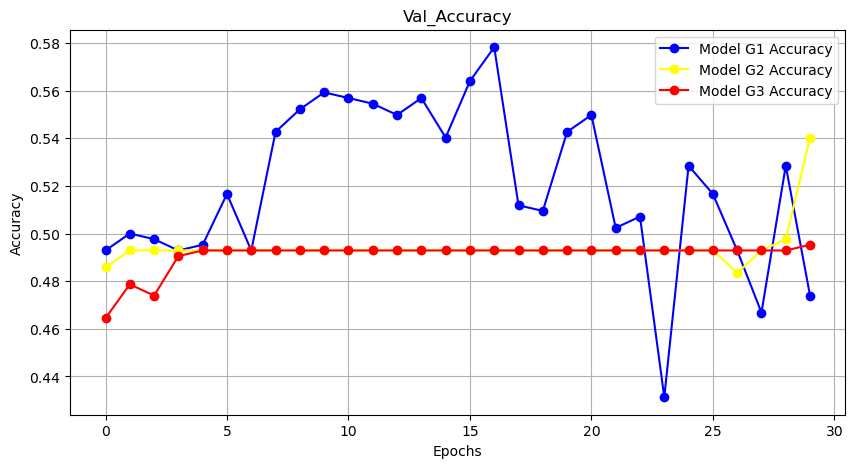

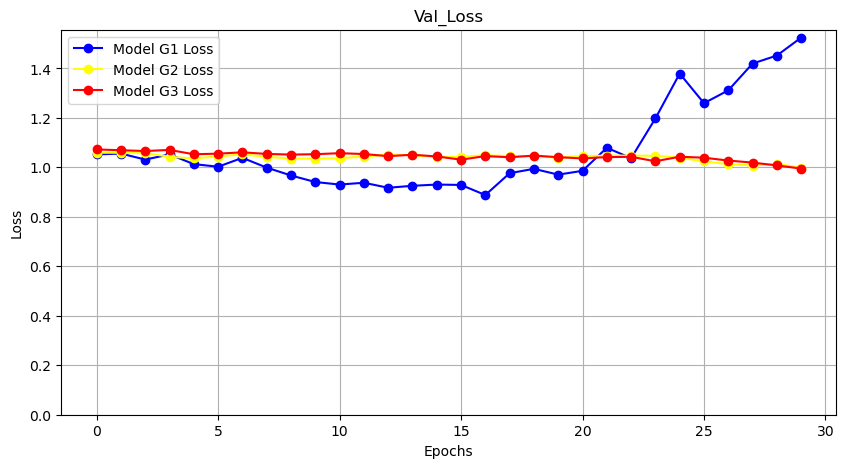

In [110]:
# 绘制Accuracy曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_acc_G1, label='Model G1 Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(val_acc_G2, label='Model G2 Accuracy', marker='o', linestyle='-', color='yellow')
plt.plot(val_acc_G3, label='Model G3 Accuracy', marker='o', linestyle='-', color='red')
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 绘制Loss曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_loss_G1, label='Model G1 Loss', marker='o', linestyle='-', color='blue')
plt.plot(val_loss_G2, label='Model G2 Loss', marker='o', linestyle='-', color='yellow')
plt.plot(val_loss_G3, label='Model G3 Loss', marker='o', linestyle='-', color='red')
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

绘制E、E1（无数据增强）模型的Accuracy和Loss曲线图

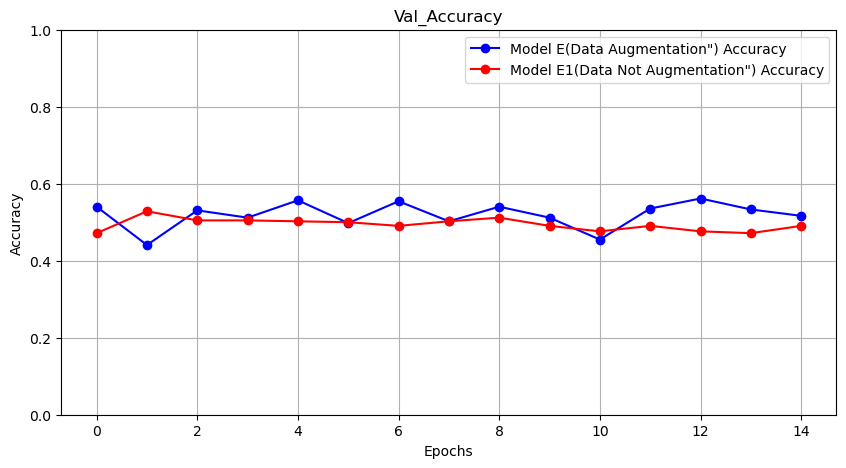

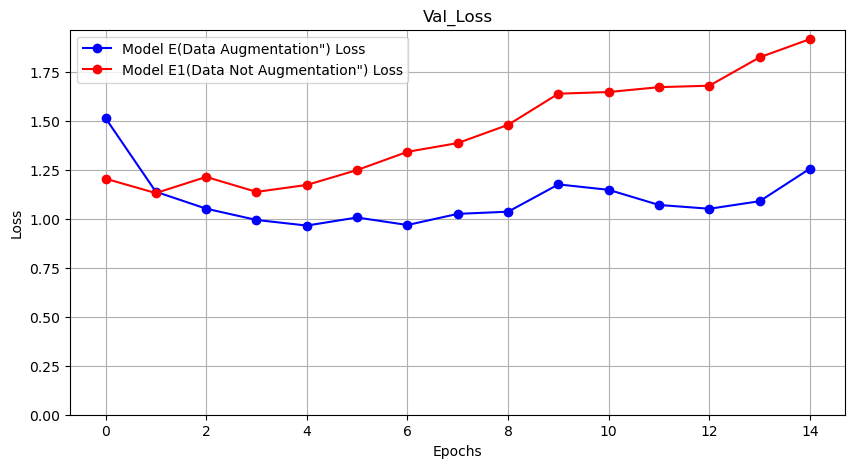

In [50]:
# 绘制Accuracy曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_acc_E, label='Model E(Data Augmentation") Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(val_acc_E1, label='Model E1(Data Not Augmentation") Accuracy', marker='o', linestyle='-', color='red')
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

# 绘制Loss曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_loss_E, label='Model E(Data Augmentation") Loss', marker='o', linestyle='-', color='blue')
plt.plot(val_loss_E1, label='Model E1(Data Not Augmentation") Loss', marker='o', linestyle='-', color='red')
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

绘制E、VGG、ResNet模型的Accuracy和Loss曲线图

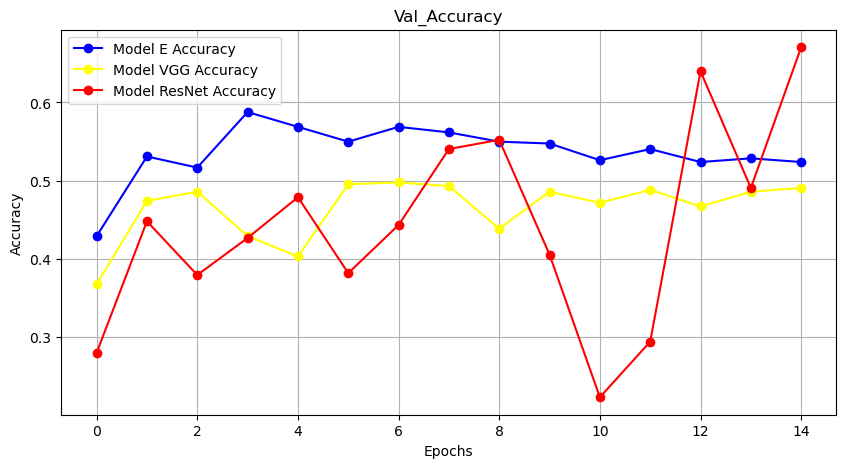

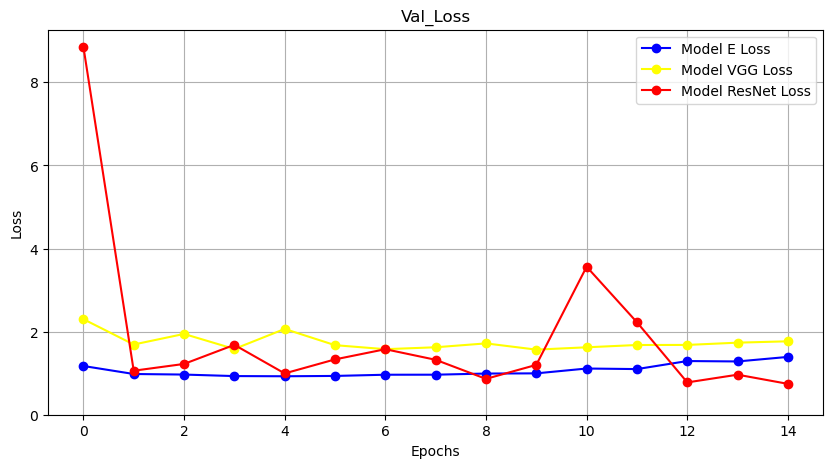

In [46]:
# 绘制Accuracy曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_acc_E, label='Model E Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(val_acc_vgg, label='Model VGG Accuracy', marker='o', linestyle='-', color='yellow')
plt.plot(val_acc_res, label='Model ResNet Accuracy', marker='o', linestyle='-', color='red')
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 绘制Loss曲线图
plt.figure(figsize=(10, 5))
plt.plot(val_loss_E, label='Model E Loss', marker='o', linestyle='-', color='blue')
plt.plot(val_loss_vgg, label='Model VGG Loss', marker='o', linestyle='-', color='yellow')
plt.plot(val_loss_res, label='Model ResNet Loss', marker='o', linestyle='-', color='red')
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,)  # 设置纵轴范围
plt.legend()
plt.grid(True)
plt.show()

获取模型中获取最后一层卷积层的名称

In [59]:
def last_layer_name(model):
    conv_layer_name = None
    for layer in model.layers[::-1]:
        if isinstance(layer, tf.keras.layers.Conv2D):
            conv_layer_name = layer.name
            break
    return conv_layer_name

Grad_Cam方法

In [60]:
import cv2
import numpy as np
from PIL import Image


def grad_cam(model, img):
    # 获取预测结果的类别索引
    img1 = np.expand_dims(img, axis=0)
    class_idx = np.argmax(model.predict(img1))

    layer = last_layer_name(model)
    # 获取模型的最后一个卷积层
    last_conv_layer = model.get_layer(layer)

    # 创建一个新模型，输出为最后一个卷积层的输出和模型的预测结果
    new_model = tf.keras.models.Model(model.inputs, [model.output, last_conv_layer.output])

    # 计算梯度
    with tf.GradientTape() as tape:
        preds, conv_outputs = new_model(img1)
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]

    # 计算全局平均池化
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # 将梯度和卷积层输出相乘
    last_conv_layer_output = conv_outputs[0]
    heatmap = last_conv_layer_output * pooled_grads[..., tf.newaxis]


    heatmap = tf.squeeze(heatmap)
    # 将所有通道的热力图合并为单个图像
    heatmap = np.mean(heatmap, axis=-1)  # 取所有通道的平均值，得到单通道的热力图
    # 对热力图进行归一化处理
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    

    # 将热力图数组缩放到0-255范围
    heatmap = (heatmap * 255).astype(np.uint8)
    heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    heatmap = np.uint8(255 * heatmap) # 将热力图转换为RGB格式
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    img_heatmap = np.array(heatmap, dtype=np.uint8)  # 将数组类型转换为uint8
    img_heatmap = Image.fromarray(img_heatmap)  # 使用Image.fromarray创建图像对象

    img_ori = np.array(img, dtype=np.uint8)  # 将数组类型转换为uint8
    img_ori = Image.fromarray(img_ori)  # 使用Image.fromarray创建图像对象
    
    blended_img = Image.blend(img_ori, img_heatmap, 0.4)

    return img_ori, blended_img


In [61]:
import cv2


def grad_cam1(model, img,layers):
    # 获取预测结果的类别索引
    img1 = np.expand_dims(img, axis=0)
    class_idx = np.argmax(model.predict(img1))


    last_conv_layer = model.get_layer(layers)

    # 创建一个新模型，输出为最后一个卷积层的输出和模型的预测结果
    new_model = tf.keras.models.Model(model.inputs, [model.output, last_conv_layer.output])

    # 计算梯度
    with tf.GradientTape() as tape:
        preds, conv_outputs = new_model(img1)
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]

    # 计算全局平均池化
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # if pooled_grads>0:
    #     pooled_grads *= -0.1
    # print(pooled_grads)
    # 将梯度和卷积层输出相乘
    last_conv_layer_output = conv_outputs[0]
    heatmap = last_conv_layer_output * pooled_grads[..., tf.newaxis]


    heatmap = tf.squeeze(heatmap)
    # 将所有通道的热力图合并为单个图像
    heatmap = np.mean(heatmap, axis=-1)  # 取所有通道的平均值，得到单通道的热力图
    # 对热力图进行归一化处理
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    

    # 将热力图数组缩放到0-255范围
    heatmap = (heatmap * 255).astype(np.uint8)
    heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    heatmap = np.uint8(255 * heatmap) # 将热力图转换为RGB格式
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    img_heatmap = np.array(heatmap, dtype=np.uint8)  # 将数组类型转换为uint8
    img_heatmap = Image.fromarray(img_heatmap)  # 使用Image.fromarray创建图像对象

    img_ori = np.array(img, dtype=np.uint8)  # 将数组类型转换为uint8
    img_ori = Image.fromarray(img_ori)  # 使用Image.fromarray创建图像对象
    
    blended_img = Image.blend(img_ori, img_heatmap, 0.4)

    return img_ori, blended_img

模型A、D、E 热力图绘制

1/1 [==============================] - 0s 32ms/step


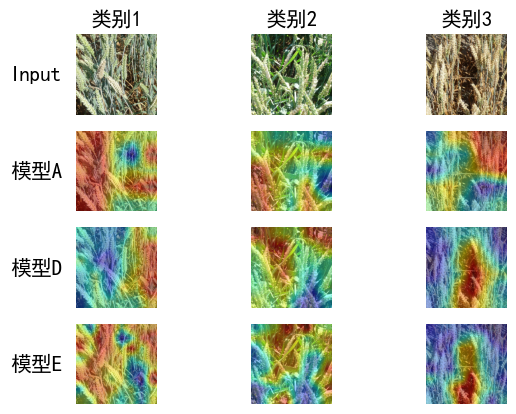

In [126]:
k1 = 0
k2 = 0
k3 = 0
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 0:
        k1 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 1:
        k2 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 2:
        k3 = i
        break

# 第1类图像
original_img_1, grad_cam_img_A_1 = grad_cam(modelA, test_data_tensor[k1])
original_img_1, grad_cam_img_D_1 = grad_cam(modelD, test_data_tensor[k1])
original_img_1, grad_cam_img_E_1 = grad_cam(modelE, test_data_tensor[k1])

# 第2类图像
original_img_2, grad_cam_img_A_2 = grad_cam(modelA, test_data_tensor[k2])
original_img_2, grad_cam_img_D_2 = grad_cam(modelD, test_data_tensor[k2])
original_img_2, grad_cam_img_E_2 = grad_cam(modelE, test_data_tensor[k2])

# 第3类图像
original_img_3, grad_cam_img_A_3 = grad_cam(modelA, test_data_tensor[k3])
original_img_3, grad_cam_img_D_3 = grad_cam(modelD, test_data_tensor[k3])
original_img_3, grad_cam_img_E_3 = grad_cam(modelE, test_data_tensor[k3])

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.figure()
plt.subplot(4, 3, 1)
plt.imshow(original_img_1)
plt.title("类别1", fontsize=15)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, 'Input', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(original_img_2)
plt.title("类别2", fontsize=15)
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(original_img_3)
plt.title("类别3", fontsize=15)
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(grad_cam_img_A_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型A', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(grad_cam_img_A_2)
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(grad_cam_img_A_3)
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(grad_cam_img_D_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型D', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(grad_cam_img_D_2)
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(grad_cam_img_D_3)
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(grad_cam_img_E_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型E', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(grad_cam_img_E_2)
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(grad_cam_img_E_3)
plt.axis('off')


plt.show()

模型F等 热力图绘制

1/1 [==============================] - 0s 25ms/step


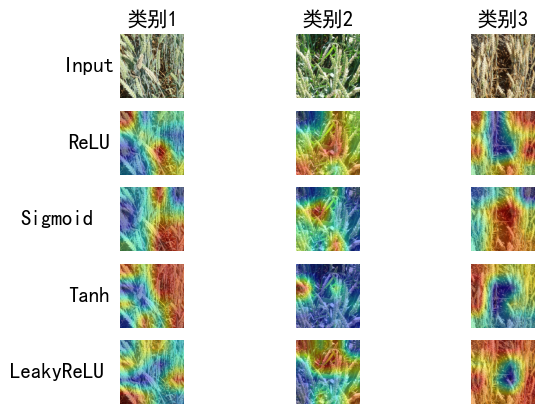

In [146]:
k1 = 0
k2 = 0
k3 = 0
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 0:
        k1 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 1:
        k2 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 2:
        k3 = i
        break

# 第1类图像
original_img_1, grad_cam_img_F1_1 = grad_cam(modelF, test_data_tensor[k1])
original_img_1, grad_cam_img_F2_1 = grad_cam(modelF_Sigmoid, test_data_tensor[k1])
original_img_1, grad_cam_img_F3_1 = grad_cam(modelF_Tanh, test_data_tensor[k1])
original_img_1, grad_cam_img_F4_1 = grad_cam(modelF_LeakyReLU, test_data_tensor[k1])

# 第2类图像
original_img_2, grad_cam_img_F1_2 = grad_cam(modelF, test_data_tensor[k2])
original_img_2, grad_cam_img_F2_2 = grad_cam(modelF_Sigmoid, test_data_tensor[k2])
original_img_2, grad_cam_img_F3_2 = grad_cam(modelF_Tanh, test_data_tensor[k2])
original_img_3, grad_cam_img_F4_2 = grad_cam(modelF_LeakyReLU, test_data_tensor[k2])

# 第3类图像
original_img_3, grad_cam_img_F1_3 = grad_cam(modelF, test_data_tensor[k3])
original_img_3, grad_cam_img_F2_3 = grad_cam(modelF_Sigmoid, test_data_tensor[k3])
original_img_3, grad_cam_img_F3_3 = grad_cam(modelF_Tanh, test_data_tensor[k3])
original_img_3, grad_cam_img_F4_3 = grad_cam(modelF_LeakyReLU, test_data_tensor[k3])

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.figure()
plt.subplot(5, 3, 1)
plt.imshow(original_img_1)
plt.title("类别1", fontsize=15)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, 'Input', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(5, 3, 2)
plt.imshow(original_img_2)
plt.title("类别2", fontsize=15)
plt.axis('off')

plt.subplot(5, 3, 3)
plt.imshow(original_img_3)
plt.title("类别3", fontsize=15)
plt.axis('off')

plt.subplot(5, 3, 4)
plt.imshow(grad_cam_img_F1_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, 'ReLU', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(5, 3, 5)
plt.imshow(grad_cam_img_F1_2)
plt.axis('off')

plt.subplot(5, 3, 6)
plt.imshow(grad_cam_img_F1_3)
plt.axis('off')

plt.subplot(5, 3, 7)
plt.imshow(grad_cam_img_F2_1)
plt.text(-original_img_1.size[1], original_img_1.size[0]//2, 'Sigmoid', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(5, 3, 8)
plt.imshow(grad_cam_img_F2_2)
plt.axis('off')

plt.subplot(5, 3, 9)
plt.imshow(grad_cam_img_F2_3)
plt.axis('off')

plt.subplot(5, 3, 10)
plt.imshow(grad_cam_img_F3_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, 'Tanh', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(5, 3, 11)
plt.imshow(grad_cam_img_F3_2)
plt.axis('off')

plt.subplot(5, 3, 12)
plt.imshow(grad_cam_img_F3_3)
plt.axis('off')

plt.subplot(5, 3, 13)
plt.imshow(grad_cam_img_F4_1)
plt.text(-original_img_1.size[1], original_img_1.size[0]//2, 'LeakyReLU', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(5, 3, 14)
plt.imshow(grad_cam_img_F4_2)
plt.axis('off')

plt.subplot(5, 3, 15)
plt.imshow(grad_cam_img_F4_3)
plt.axis('off')


plt.show()

模型A、B、C 热力图绘制

1/1 [==============================] - 0s 33ms/step


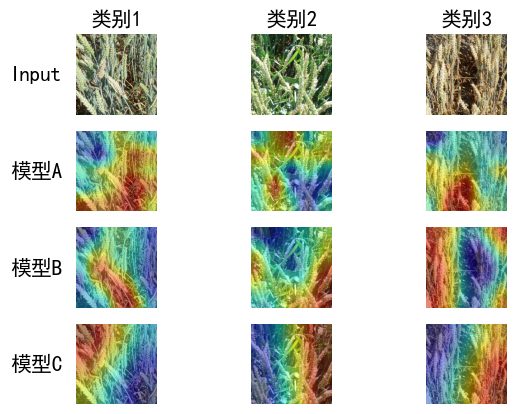

In [198]:
k1 = 0
k2 = 0
k3 = 0
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 0:
        k1 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 1:
        k2 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 2:
        k3 = i
        break

# 第1类图像
original_img_1, grad_cam_img_A_1 = grad_cam(modelA, test_data_tensor[k1])
original_img_1, grad_cam_img_B_1 = grad_cam1(modelB, test_data_tensor[k1],"conv2d_55")
original_img_1, grad_cam_img_C_1 = grad_cam(modelC, test_data_tensor[k1])

# 第2类图像
original_img_2, grad_cam_img_A_2 = grad_cam(modelA, test_data_tensor[k2])
original_img_2, grad_cam_img_B_2 = grad_cam1(modelB, test_data_tensor[k2],"conv2d_55")
original_img_2, grad_cam_img_C_2 = grad_cam(modelC, test_data_tensor[k2])

# 第3类图像
original_img_3, grad_cam_img_A_3 = grad_cam(modelA, test_data_tensor[k3])
original_img_3, grad_cam_img_B_3 = grad_cam1(modelB, test_data_tensor[k3],"conv2d_55")
original_img_3, grad_cam_img_C_3 = grad_cam(modelC, test_data_tensor[k3])

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.figure()
plt.subplot(4, 3, 1)
plt.imshow(original_img_1)
plt.title("类别1", fontsize=15)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, 'Input', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(original_img_2)
plt.title("类别2", fontsize=15)
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(original_img_3)
plt.title("类别3", fontsize=15)
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(grad_cam_img_A_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型A', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(grad_cam_img_A_2)
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(grad_cam_img_A_3)
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(grad_cam_img_B_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型B', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(grad_cam_img_B_2)
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(grad_cam_img_B_3)
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(grad_cam_img_C_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型C', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(grad_cam_img_C_2)
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(grad_cam_img_C_3)
plt.axis('off')


plt.show()

模型E、ResNet、VGG 热力图绘制

1/1 [==============================] - 0s 25ms/step


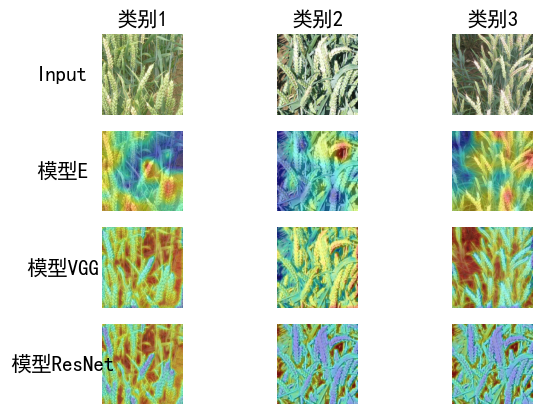

In [65]:
k1 = 0
k2 = 0
k3 = 0
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 0:
        k1 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 1:
        k2 = i
        break
for i in range(0,len(test_label_tensor)):
    if int(test_label_tensor[i]) == 2:
        k3 = i
        break

# 第1类图像
original_img_1, grad_cam_img_E_1 = grad_cam(modelE, test_data_tensor[k1])
original_img_1, grad_cam_img_vgg_1 = grad_cam(modelvgg, test_data_tensor[k1])
original_img_1, grad_cam_img_res_1 = grad_cam(modelres, test_data_tensor[k1])

# 第2类图像
original_img_2, grad_cam_img_E_2 = grad_cam(modelE, test_data_tensor[k2])
original_img_2, grad_cam_img_vgg_2 = grad_cam(modelvgg, test_data_tensor[k2])
original_img_2, grad_cam_img_res_2 = grad_cam(modelres, test_data_tensor[k2])

# 第3类图像
original_img_3, grad_cam_img_E_3 = grad_cam(modelE, test_data_tensor[k3])
original_img_3, grad_cam_img_vgg_3 = grad_cam(modelvgg, test_data_tensor[k3])
original_img_3, grad_cam_img_res_3 = grad_cam(modelres, test_data_tensor[k3])

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.figure()
plt.subplot(4, 3, 1)
plt.imshow(original_img_1)
plt.title("类别1", fontsize=15)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, 'Input', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(original_img_2)
plt.title("类别2", fontsize=15)
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(original_img_3)
plt.title("类别3", fontsize=15)
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(grad_cam_img_E_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型E', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(grad_cam_img_E_2)
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(grad_cam_img_E_3)
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(grad_cam_img_vgg_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型VGG', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(grad_cam_img_vgg_2)
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(grad_cam_img_vgg_3)
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(grad_cam_img_res_1)
plt.text(-original_img_1.size[1]//2, original_img_1.size[0]//2, '模型ResNet', fontsize=15, color='black', ha='center', va='center')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(grad_cam_img_res_2)
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(grad_cam_img_res_2)
plt.axis('off')


plt.show()